<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Before-your-start:" data-toc-modified-id="Before-your-start:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Before your start:</a></span></li><li><span><a href="#Challenge-1---Import-and-Describe-the-Dataset" data-toc-modified-id="Challenge-1---Import-and-Describe-the-Dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Challenge 1 - Import and Describe the Dataset</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Explore-the-dataset-with-mathematical-and-visualization-techniques.-What-do-you-find?" data-toc-modified-id="Explore-the-dataset-with-mathematical-and-visualization-techniques.-What-do-you-find?-2.0.0.1"><span class="toc-item-num">2.0.0.1&nbsp;&nbsp;</span>Explore the dataset with mathematical and visualization techniques. What do you find?</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-2---Data-Cleaning-and-Transformation" data-toc-modified-id="Challenge-2---Data-Cleaning-and-Transformation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Challenge 2 - Data Cleaning and Transformation</a></span></li><li><span><a href="#Challenge-3---Data-Preprocessing" data-toc-modified-id="Challenge-3---Data-Preprocessing-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Challenge 3 - Data Preprocessing</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#We-will-use-the-StandardScaler-from-sklearn.preprocessing-and-scale-our-data.-Read-more-about-StandardScaler-here." data-toc-modified-id="We-will-use-the-StandardScaler-from-sklearn.preprocessing-and-scale-our-data.-Read-more-about-StandardScaler-here.-4.0.0.1"><span class="toc-item-num">4.0.0.1&nbsp;&nbsp;</span>We will use the <code>StandardScaler</code> from <code>sklearn.preprocessing</code> and scale our data. Read more about <code>StandardScaler</code> <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler" target="_blank">here</a>.</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-4---Data-Clustering-with-K-Means" data-toc-modified-id="Challenge-4---Data-Clustering-with-K-Means-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Challenge 4 - Data Clustering with K-Means</a></span></li><li><span><a href="#Challenge-5---Data-Clustering-with-DBSCAN" data-toc-modified-id="Challenge-5---Data-Clustering-with-DBSCAN-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Challenge 5 - Data Clustering with DBSCAN</a></span></li><li><span><a href="#Challenge-6---Compare-K-Means-with-DBSCAN" data-toc-modified-id="Challenge-6---Compare-K-Means-with-DBSCAN-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Challenge 6 - Compare K-Means with DBSCAN</a></span></li><li><span><a href="#Bonus-Challenge-2---Changing-K-Means-Number-of-Clusters" data-toc-modified-id="Bonus-Challenge-2---Changing-K-Means-Number-of-Clusters-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Bonus Challenge 2 - Changing K-Means Number of Clusters</a></span></li><li><span><a href="#Bonus-Challenge-3---Changing-DBSCAN-eps-and-min_samples" data-toc-modified-id="Bonus-Challenge-3---Changing-DBSCAN-eps-and-min_samples-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Bonus Challenge 3 - Changing DBSCAN <code>eps</code> and <code>min_samples</code></a></span></li></ul></div>

# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings                                              
from sklearn.exceptions import DataConversionWarning          
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [2]:
# loading the data:
customers = pd.read_csv('../data/Wholesale customers data.csv')

#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [3]:
# Your code here:
# * What does each column mean?
display(customers.head(10))

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
5,2,3,9413,8259,5126,666,1795,1451
6,2,3,12126,3199,6975,480,3140,545
7,2,3,7579,4956,9426,1669,3321,2566
8,1,3,5963,3648,6192,425,1716,750
9,2,3,6006,11093,18881,1159,7425,2098


In [4]:
# * Any categorical data to convert?
# * Any missing data to remove? 
print(customers.shape, '\n')
print(customers.info(memory_usage='deep'),'\n')
print(customers[customers.isna()].sum())

(440, 8) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB
None 

Channel             0.0
Region              0.0
Fresh               0.0
Milk                0.0
Grocery             0.0
Frozen              0.0
Detergents_Paper    0.0
Delicassen          0.0
dtype: float64


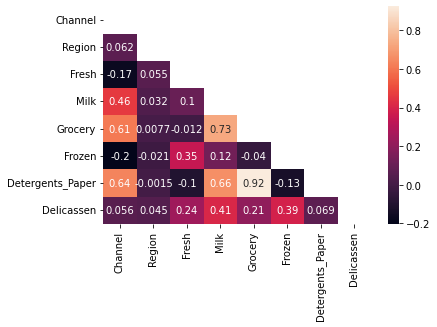

In [5]:
# * Column collinearity - any high correlations? # Matriz de correlacion

mascara = np.triu(np.ones_like(customers.corr(), dtype=bool))

sns.heatmap(customers.corr(), annot=True, mask = mascara)

plt.show()

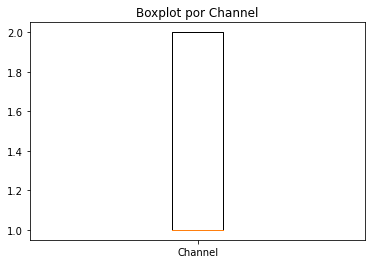

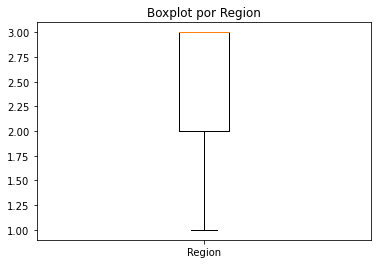

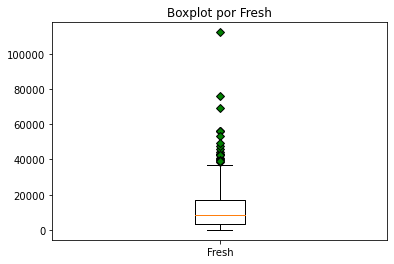

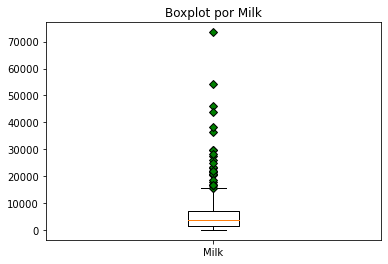

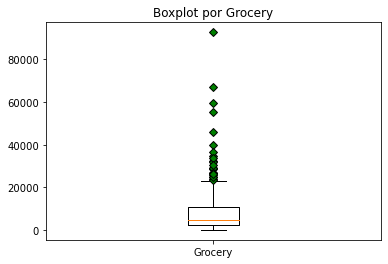

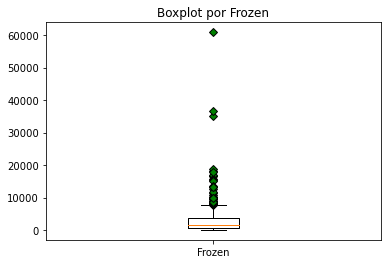

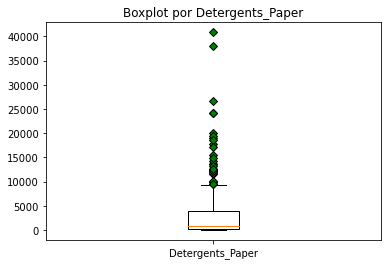

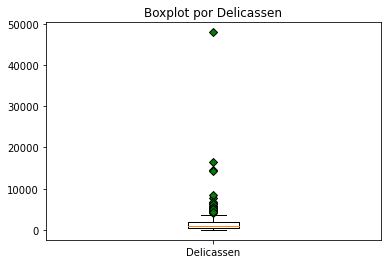

In [6]:
# * Descriptive statistics - any outliers to remove? 
for column in customers:
    green_diamond = dict(markerfacecolor='g', marker='D')
    fig, ax = plt.subplots()
    ax.set_title(f'Boxplot por {column}')
    ax.boxplot(customers[f'{column}'], flierprops=green_diamond, labels=[f"{column}"]);

In [7]:
#%pip install pyod  # instala la librería

from pyod.models.knn import KNN
import pandas as pd

In [8]:
#help(KNN)

In [9]:
X = customers

model = KNN(contamination=0.1)
model.fit(X)
y_pred = model.predict(X)
display(X[y_pred == 1])
print('Outliers: ', len(X[y_pred == 1]))
display(X.describe())

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
23,2,3,26373,36423,22019,5154,4337,16523
39,1,3,56159,555,902,10002,212,2916
47,2,3,44466,54259,55571,7782,24171,6465
49,2,3,4967,21412,28921,1798,13583,1163
56,2,3,4098,29892,26866,2616,17740,1340
61,2,3,35942,38369,59598,3254,26701,2017
65,2,3,85,20959,45828,36,24231,1423
71,1,3,18291,1266,21042,5373,4173,14472
77,2,3,12205,12697,28540,869,12034,1009
85,2,3,16117,46197,92780,1026,40827,2944


Outliers:  38


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [10]:
# * Column-wise data distribution - is the distribution skewed? # Pandas.skew()
customers.skew()

Channel              0.760951
Region              -1.283627
Fresh                2.561323
Milk                 4.053755
Grocery              3.587429
Frozen               5.907986
Detergents_Paper     3.631851
Delicassen          11.151586
dtype: float64

**Your observations here**

+ 440 Filas, 8 columnas, todas numericas, sin valores nulos
+ La columna region no tiene casi correlacion con ninguna otra columna
+ Con un 0,1 de contaminacion, detecta 38 registros outliers repartidos entre todas las columnas
+ Hay skew en todas las columnas pero principalmente en 'Delicassen'


# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [11]:
# Your code here
customers = customers.drop(columns=['Region'])
customers = customers.drop(X[y_pred == 1].index.values, axis=0).reset_index(drop=True)

In [12]:
customers.skew()

Channel             0.858071
Fresh               1.543274
Milk                1.335197
Grocery             1.438390
Frozen              2.233415
Detergents_Paper    1.901493
Delicassen          2.111199
dtype: float64

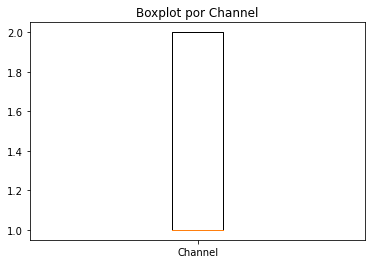

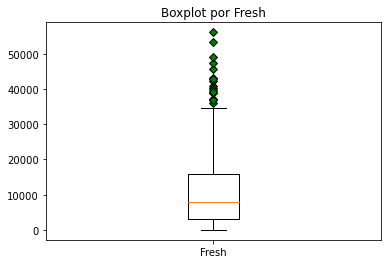

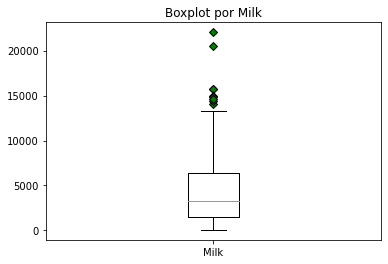

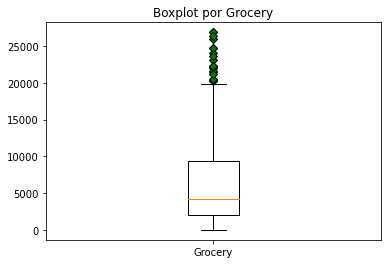

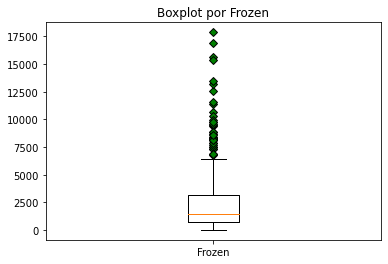

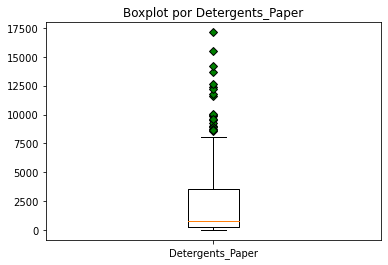

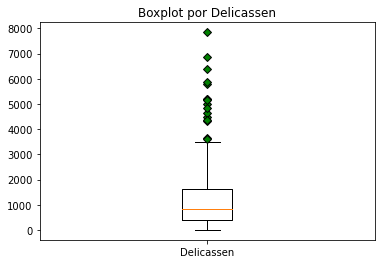

In [13]:
for column in customers:
    green_diamond = dict(markerfacecolor='g', marker='D')
    fig, ax = plt.subplots()
    ax.set_title(f'Boxplot por {column}')
    ax.boxplot(customers[f'{column}'], flierprops=green_diamond, labels=[f"{column}"]);

**Your comment here**

+ Eliminamos la columna region que no tiene correlacion con el resto y porque pensamos que no aporta nada
+ Eliminamos los outliers reduciendo el skew considerablemente

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [14]:
# Your import here:

from sklearn.preprocessing import StandardScaler

# Your code here:

scaler=StandardScaler()

customers_scale = scaler.fit_transform(customers[['Channel','Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']])

In [15]:
customers_scale = pd.DataFrame(customers_scale, columns=['Channel','Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'])

In [16]:
customers_scale.head()

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.514953,0.177473,1.424032,0.198231,-0.802621,0.146240,0.121464
1,1.514953,-0.371864,1.465604,0.540650,-0.269422,0.353551,0.497425
2,1.514953,-0.440775,1.195120,0.219217,-0.047945,0.428236,5.705942
3,-0.660087,0.235813,-0.859695,-0.371613,1.329484,-0.579517,0.507725
4,1.514953,1.151047,0.277850,0.136299,0.472164,-0.154177,3.423568


# Challenge 4 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

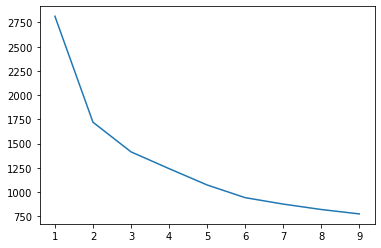

In [17]:
from sklearn import cluster
n_clusters, inercia = zip(*[(k, cluster.KMeans(n_clusters=k).fit(customers_scale).inertia_) for k in range(1, 10)])

fig=plt.figure()

ax=fig.add_subplot()
ax.plot(n_clusters, inercia);

In [18]:
from sklearn.cluster import KMeans
# Your code here:
kmeans=KMeans(n_clusters=2)
clusters=kmeans.fit(customers_scale)
preds=clusters.fit_predict(customers_scale)

Count the values in `labels`.

In [19]:
# Your code here:
customers['labels']=preds
customers.groupby('labels').count()

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
labels,,,,,,,
0,118,118,118,118,118,118,118
1,284,284,284,284,284,284,284


In [20]:
#customers.groupby('labels').describe().T

# Challenge 5 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [21]:
# Your code here
from sklearn.cluster import DBSCAN 
dbscan = DBSCAN()
dbscan.fit(customers_scale)
dbscan_preds = dbscan.fit_predict(customers_scale)

Count the values in `labels_DBSCAN`.

In [22]:
# Your code here
customers['labels_DBSCAN']=dbscan_preds
customers.groupby('labels_DBSCAN').count()

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels
labels_DBSCAN,,,,,,,,
-1,296,296,296,296,296,296,296,296
0,83,83,83,83,83,83,83,83
1,6,6,6,6,6,6,6,6
2,13,13,13,13,13,13,13,13
3,4,4,4,4,4,4,4,4


# Challenge 6 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

K-Means


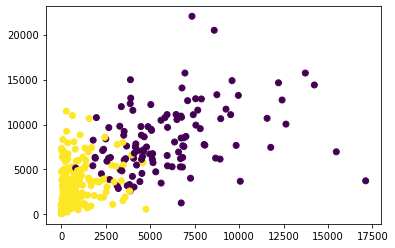

DBSCAN


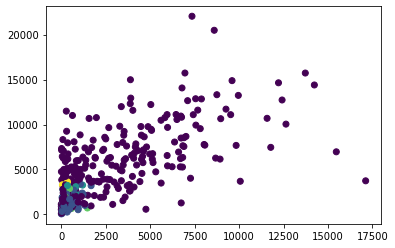

In [35]:
# Your code here:
print('K-Means')
plt.scatter(customers.Detergents_Paper, customers.Milk, c=customers.labels)
plt.show()
print('DBSCAN')
plt.scatter(customers.Detergents_Paper, customers.Milk, c=customers.labels_DBSCAN)
plt.show()

Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

K-Means


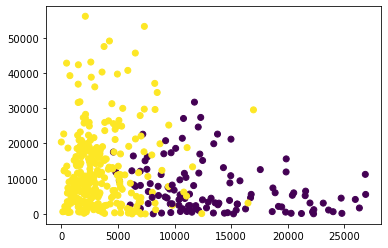

DBSCAN


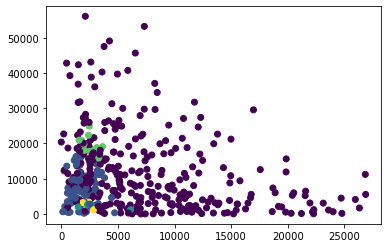

In [24]:
# Your code here:
print('K-Means')
plt.scatter(customers.Grocery, customers.Fresh, c=customers.labels)
plt.show()
print('DBSCAN')
plt.scatter(customers.Grocery, customers.Fresh, c=customers.labels_DBSCAN)
plt.show()

Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

K-Means


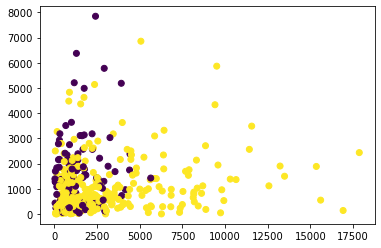

DBSCAN


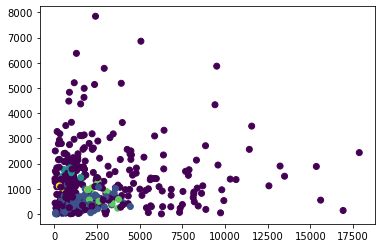

In [36]:
# Your code here:
print('K-Means')
plt.scatter(customers.Frozen, customers.Delicassen, c=customers.labels)
plt.show()
print('DBSCAN')
plt.scatter(customers.Frozen, customers.Delicassen, c=customers.labels_DBSCAN)
plt.show()

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [42]:
# Your code here:
display(customers.groupby('labels').mean())
display(customers.groupby('labels_DBSCAN').mean())
display(customers.mean())

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels_DBSCAN
labels,,,,,,,,
0,1.957627,7347.779661,8367.872881,13458.686441,1342.262712,5951.279661,1514.550847,-1.000000
1,1.031690,12313.563380,2724.077465,3465.915493,3043.591549,694.239437,1064.341549,-0.471831


,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels
labels_DBSCAN,,,,,,,,
-1,1.412162,11885.554054,5416.966216,7969.016892,2883.668919,2903.746622,1413.064189,0.601351
0,1.000000,6904.698795,1298.807229,1840.060241,1501.566265,352.240964,471.493976,1.000000
1,1.000000,1908.000000,2969.000000,3039.833333,887.833333,615.666667,1643.666667,1.000000
2,1.000000,19373.615385,1424.307692,2552.461538,2732.769231,470.230769,746.769231,1.000000
3,1.000000,2392.750000,3373.500000,2367.500000,929.500000,215.750000,1004.750000,1.000000


Channel                 1.303483
Fresh               10855.945274
Milk                 4380.713930
Grocery              6399.116915
Frozen               2544.196517
Detergents_Paper     2237.350746
Delicassen           1196.492537
labels                  0.706468
labels_DBSCAN          -0.626866
dtype: float64

Which algorithm appears to perform better?

**Your observations here**

 Me cuesta un poco ver cual de los dos modelos clusteriza mejor a traves de sus medias. Si fuera por los graficos diria que kmeans funciona mejor, aunque si fuera por la diferencia de medias podria ser DBSCAN. Para mi ninguno de los dos esta haciendo buenos clusters. 

# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [27]:
# Your code here

**Your comment here**

Segun puedo ver, 2 clusters parecen funcionar mejor.

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [28]:
# Your code here

**Your comment here**

+ 
+ 
+ 
